In [30]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.colors as mpl_colors

In [3]:
dataset = pd.read_csv("./kalimati_tarkari_dataset_cleaned.csv")

In [4]:
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset["Month"]= dataset['Date'].dt.month

In [5]:
dataset["min_max_range"] =( dataset["Maximum"] - dataset["Minimum"] )*100/dataset['Average']

            SN      Commodity       Date Unit  Minimum  Maximum  Average  \
54          54  Mango(Maldah) 2013-06-16   Kg     50.0     60.0     55.0   
127        127  Mango(Maldah) 2013-06-17   Kg     50.0     60.0     55.0   
200        200  Mango(Maldah) 2013-06-18   Kg     50.0     60.0     55.0   
273        273  Mango(Maldah) 2013-06-19   Kg     50.0     60.0     55.0   
347        347  Mango(Maldah) 2013-06-20   Kg     50.0     60.0     55.0   
...        ...            ...        ...  ...      ...      ...      ...   
196768  196768  Mango(Maldah) 2021-05-09   Kg     70.0     80.0     75.0   
196859  196859  Mango(Maldah) 2021-05-10   Kg     70.0     80.0     75.0   
196948  196948  Mango(Maldah) 2021-05-11   Kg     50.0     60.0     55.0   
197041  197041  Mango(Maldah) 2021-05-12   Kg     50.0     60.0     55.0   
197131  197131  Mango(Maldah) 2021-05-13   Kg     60.0     70.0     65.0   

        Month  min_max_range  
54          6      18.181818  
127         6      18.181

NameError: name 'st' is not defined

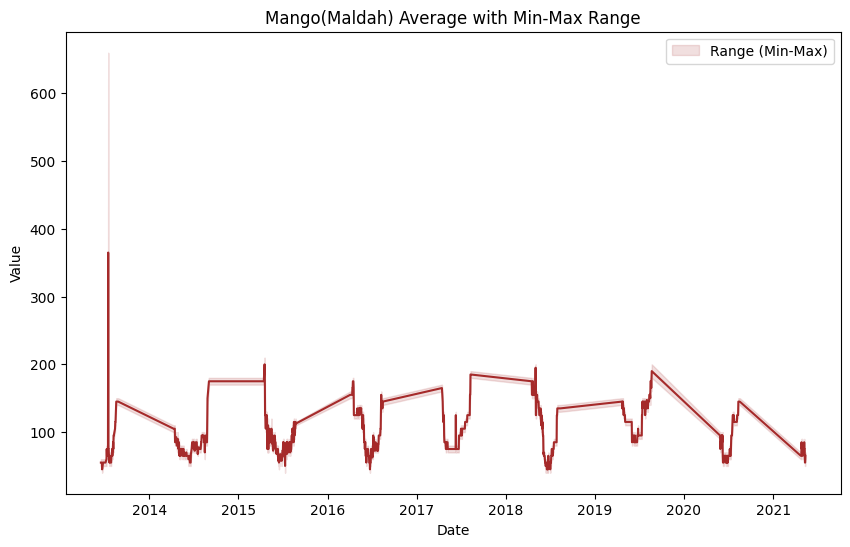

In [32]:
grouped_df = dataset.groupby('Commodity')
print(grouped_df.get_group("Mango(Maldah)"))

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(grouped_df.get_group("Mango(Maldah)")["Date"], grouped_df.get_group("Mango(Maldah)")["Average"], c='brown')
ax.fill_between(grouped_df.get_group("Mango(Maldah)")['Date'], 
                 grouped_df.get_group("Mango(Maldah)")['Minimum'], 
                 grouped_df.get_group("Mango(Maldah)")['Maximum'],
                 color=mpl_colors.to_rgba('brown', 0.15),
                 label='Range (Min-Max)')

ax.set_xlabel('Date')
ax.set_ylabel('Value')
ax.set_title('Mango(Maldah) Average with Min-Max Range')
ax.legend()

st.pyplot(fig)

# plt.plot(grouped_df['Commodity'], grouped_df['Minimum'], marker='o', label='Minimum', linestyle='-', color='blue')
# plt.plot(grouped_df['Commodity'], grouped_df['Maximum'], marker='o', label='Maximum', linestyle='-', color='red')
# plt.plot(grouped_df['Commodity'], grouped_df['Average'], marker='o', label='Average', linestyle='-', color='green')


In [129]:
grouped_min_max_data = dataset.groupby('Commodity').agg({'Average': ['mean', 'std'],"min_max_range": ['mean',"std"]}) 
grouped_min_max_data[("Average","cv")] = grouped_min_max_data[("Average",'std')] / grouped_min_max_data[("Average",'mean')]

print(grouped_min_max_data)
grouped_min_max_data

                        Average             min_max_range             Average
                           mean         std          mean       std        cv
Commodity                                                                    
Apple(Fuji)          280.025316   39.922188      6.481188  4.170935  0.142566
Apple(Jholey)        122.283824   36.720520      9.296635  3.071920  0.300289
Arum                  42.602228    8.996921     14.110938  5.460226  0.211184
Asparagus            321.646919  148.461336     11.866109  7.000076  0.461566
Bakula                67.066313   23.557621     12.008479  4.527880  0.351259
...                         ...         ...           ...       ...       ...
Turnip                57.992857   16.226395     11.884975  3.373120  0.279800
Turnip A              55.860323   16.650512     13.044696  4.674111  0.298074
Water Melon(Dotted)   32.904762    7.563744     17.874000  6.216492  0.229868
Water Melon(Green)    46.164427   14.457301     13.432947  5.905

Average             min_max_range             Average
                           mean         std          mean       std        cv
Commodity                                                                    
Apple(Fuji)          280.025316   39.922188      6.481188  4.170935  0.142566
Apple(Jholey)        122.283824   36.720520      9.296635  3.071920  0.300289
Arum                  42.602228    8.996921     14.110938  5.460226  0.211184
Asparagus            321.646919  148.461336     11.866109  7.000076  0.461566
Bakula                67.066313   23.557621     12.008479  4.527880  0.351259
...                         ...         ...           ...       ...       ...
Turnip                57.992857   16.226395     11.884975  3.373120  0.279800
Turnip A              55.860323   16.650512     13.044696  4.674111  0.298074
Water Melon(Dotted)   32.904762    7.563744     17.874000  6.216492  0.229868
Water Melon(Green)    46.164427   14.457301     13.432947  5.905963  0.313170
Yam                   43.600905   14.704348     12.869061  4.647353  0.337249

[132 rows x 5 columns]

In [33]:
# Plot histogram for mean max range
plt.figure(figsize=(10, 6))
plt.hist(grouped_min_max_data[('Average', 'cv')], bins=132, color='lightgreen')
plt.grid()
plt.xlabel('Mean Max Range')
plt.ylabel('Frequency')
plt.title('Histogram of Mean Max Range')
plt.show()

NameError: name 'grouped_min_max_data' is not defined

<Figure size 1000x600 with 0 Axes>

In [121]:
print(more_than_15)

['Barela', 'Bottle Gourd', 'Brd Leaf Mustard', 'Brinjal Long', 'Brinjal Round', 'Cabbage', 'Cabbage(Local)', 'Cabbage(Terai)', 'Carrot(Terai)', 'Cauli Local', 'Cauli Local(Jyapu)', 'Cauli Terai', 'Christophine', 'Cucumber(Hybrid)', 'Jack Fruit', 'Lemon', 'Lime', 'Maize', 'Mandarin', 'Mango(Chousa)', 'Raddish Red', 'Raddish White(Hybrid)', 'Raddish White(Local)', 'Smooth Gourd', 'Snake Gourd', 'Squash(Long)', 'Squash(Round)', 'Sugarcane', 'Tomato Small(Indian)', 'Tomato Small(Local)', 'Tomato Small(Terai)', 'Tomato Small(Tunnel)', 'Water Melon(Dotted)']


In [34]:
grouped_range_data = dataset.groupby('Commodity').agg({'Average': ['mean', 'std']})

print(grouped_range_data)

                        Average            
                           mean         std
Commodity                                  
Apple(Fuji)          280.025316   39.922188
Apple(Jholey)        122.283824   36.720520
Arum                  42.602228    8.996921
Asparagus            321.646919  148.461336
Bakula                67.066313   23.557621
...                         ...         ...
Turnip                57.992857   16.226395
Turnip A              55.860323   16.650512
Water Melon(Dotted)   32.904762    7.563744
Water Melon(Green)    46.164427   14.457301
Yam                   43.600905   14.704348

[132 rows x 2 columns]


In [ ]:
data = pd.read_csv("./data_clustered.csv")
data.drop(columns=["Year","Month","Day","Price_Range","Price_Change","Cluster"],inplace=True)
data.to_csv("./data_clustered_cleaned.csv",index=False)
